![image](https://storage.googleapis.com/kaggle-competitions/kaggle/39462/logos/header.png?t=2022-09-30-14-50-31)

# KAGGLE DATA SCIENCE AND MACHINE LEARNING SURVEY 2022

The Kaggle 2022 Data Science and Machine Learning Survey provides valuable insights into the current state of the data science and machine learning field. In this exploratory data analysis (EDA), we will take a closer look at the survey responses to understand the trends, challenges, and tools used by data scientists and machine learning practitioners.

We will begin by importing the necessary libraries and loading the survey data into a pandas DataFrame. Next, we will perform some initial data cleaning and preprocessing to ensure that the data is in a usable format. After that, we will use a variety of visualizations and statistical techniques to uncover patterns and relationships in the data. We will also examine the responses to specific questions related to the respondents' backgrounds, education, and experience in the field.

Through this EDA, we hope to gain a better understanding of the current state of the data science and machine learning field and identify key trends and challenges facing practitioners today. We will also be able to see the popular tool and technology being used in the field and how the field is evolving over time.





### KAGGLE API + GOOGLE COLAB API

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle kernels list — user YOUR_USER — sort-by dateRun

!kaggle competitions download -c kaggle-survey-2022

Saving kaggle.json to kaggle.json
kaggle.json
usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: unrecognized arguments: — user YOUR_USER — sort-by dateRun
  0% 0.00/2.20M [00:00<?, ?B/s]
100% 2.20M/2.20M [00:00<00:00, 123MB/s]


In [ ]:
!unzip kaggle-survey-2022.zip

Archive:  kaggle-survey-2022.zip
  inflating: Supplementary Data/kaggle_survey_2022_answer_choices.pdf  
  inflating: Supplementary Data/kaggle_survey_2022_methodology.pdf  
  inflating: kaggle_survey_2022_responses.csv  


In [ ]:
# LIBRARIES

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ds_ml_data = pd.read_csv("/content/kaggle_survey_2022_responses.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# DATA EXPLORATION

In [79]:
## PRE DEFINED FUNCTIONS FOR DATA VISUALIZATION

def multiple_column(column_num, rename_value, title, x, y):
    data_warehouse = [col for col in ds_ml_data.columns if col.startswith(column_num)]
    column_name = ds_ml_data[data_warehouse]
    final = column_name.melt(var_name = 'title', value_vars = column_name)
    final.drop(['title'], axis=1, inplace = True)
    final.dropna(inplace = True)
    final = final.groupby(['value']).size().reset_index().rename(columns={'value': rename_value, 0 : 'count'}).sort_values(by = 'count', ascending=False)
    final['total'] = final['count'].sum()
    final['pertcg'] = ((final['count']/final['total'])*100).round(2)
    final.reset_index(drop= True)
    
    fig = px.bar(final, 
                 x= x, 
                 y= y, 
                 width= 1000, 
                 height= 600, 
                 title= title, hover_data= ['pertcg'])
    fig.update_layout(yaxis=dict(autorange="reversed"))

    fig.show()

def dist_graph(dataframe, column, rename_index, rename_column, title):
    row_count = dataframe[column].value_counts().to_frame().reset_index().rename({'index': rename_index, 
                                                                                  column: rename_column}, axis=1)
    row_count['total'] = row_count[rename_column].sum()
    row_count['pertcg'] = ((row_count[rename_column]/row_count['total'])*100).round(2)
    row_count2 = row_count.head(15)
#     display(row_count2) 

    fig = px.bar(row_count2, 
                 x= rename_column, 
                 y=  rename_index, 
                 width= 900, 
                 height= 600, 
                 title= title, 
                 hover_data= ['pertcg'])
    fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.show()

def word_cloud(column_num, rename_value, title):
    data_warehouse = [col for col in ds_ml_data.columns if col.startswith(column_num)]
    column_name = ds_ml_data[data_warehouse]
    final = column_name.melt(var_name = 'title', value_vars = column_name)
    final.drop(['title'], axis=1, inplace = True)
    final.dropna(inplace = True)
    
    text = " ".join(word for word in final[final.columns[0]])
    word_cloud = WordCloud(collocations = False, 
                           background_color = 'white', 
                           width = 800, 
                           height = 400, 
                           random_state = 21, 
                           max_font_size = 100).generate(text)
    
    plt.figure(figsize=(10,8))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

def funnel(job, column_num, rename_value, title, x, y):
    df = ds_ml_data[ds_ml_data['Q23'] == job]
    data_warehouse = [col for col in df.columns if col.startswith(column_num)]
    column_name = df[data_warehouse]
    final = column_name.melt(var_name = 'title', value_vars = column_name)
    final.drop(['title'], axis=1, inplace = True)
    final.dropna(inplace = True)
    final = final.groupby(['value']).size().reset_index().rename(columns={'value': rename_value, 0 : 'count'}).sort_values(by = 'count', ascending=False)
    final['total'] = final['count'].sum()
    final['pertcg'] = ((final['count']/final['total'])*100).round(2)
    final = final.head(6)
    final.reset_index(drop= True)
    
    fig = go.Figure(go.Funnelarea(
        text = final[y].to_list(),
        values = final[x].to_list(),
        marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "white", "silver", "yellow"]},
        textfont = {"family": "Times New Roman", "size": 50, "color": "black"}, opacity = 0.75))
    
    fig.update_layout(dict(
        title = f"<span style='font-size:25px; font-family:Times New Roman'>{job} Job Description</span>",
        font = dict(color = '#3b5b21'),
        margin = dict(t=170),
        width = 900,
        height= 700,
        plot_bgcolor = "white"))

    fig.update_traces(showlegend=False)
    fig.show()

def tree_map(x1, x2, x3, text):
    tree_size = ds_ml_data.groupby([x1, x2,x3]).size().reset_index().rename(columns={0: 'count'})

    fig = px.treemap(tree_size, values='count', path=[x1,x2,x3], template='seaborn',
                    title=text)
    fig.update_traces(textinfo="label+percent parent")
    fig.show()

def tree_map_2(x1, x2, text):
    tree_size = ds_ml_data.groupby([x1, x2]).size().reset_index().rename(columns={0: 'count'})

    fig = px.treemap(tree_size, values='count', path=[x1,x2], template='seaborn',
                    title=text)
    fig.update_traces(textinfo="label+percent parent")
    fig.show()

In [13]:
# remove rows with survey question.
ds_ml_data = ds_ml_data.iloc[1:]

## EXPERIENCE LEVEL AND GEOGRAPHY

In [14]:
dist_graph(ds_ml_data, 'Q23', 'data professionals', 'professionals_count', 'Data Professionals Distribution')

Data Scientists made up more than 18% of those who filled the survey.

In [15]:
dist_graph(ds_ml_data, 'Q11', 'experience_level', 'experience_level_count', 'Experience Level Distribution')

* A majority of respondents are still new to programming and writing code.

In [16]:
dist_graph(ds_ml_data, 'Q4', 'country', 'country_count', 'Display of the Top Countries Distribution') 

* A majority of AI and ML practitioners are in **India** and **USA**.

In [20]:
country_data = ds_ml_data.groupby(['Q4']).size().reset_index().rename(columns={0: 'count'})

fig = px.choropleth(country_data, 
                    locations="Q4", 
                    color="count", 
                    locationmode='country names',
                    range_color=[0,1000],
                    color_continuous_scale=[(0, "#F0F0F0"), (1, '#FF0000')], #01c9ff #00FF00
                    template='seaborn')

fig.update_layout(
    title="World Map Location for Data Science and ML Survey",
    font=dict(family="Monospace", size=14))

fig.show()

## AGE AND GENDER DISTRIBUTION

In [29]:
age_gender = ds_ml_data.groupby(['Q3', 'Q2']).size().reset_index().rename(columns={0: 'count', 'Q3': 'gender', 
                                                                                'Q2': 'age group'})
age_gender['total'] = age_gender['count'].sum()
age_gender['pertcg'] = ((age_gender['count']/age_gender['total'])*100).round(2)

fig = px.histogram(age_gender, 
                   x="age group", 
                   y="count", 
                   color='gender', 
                   barmode='overlay', 
                   hover_data=['pertcg'],
                   height=450,  
                   width= 900, 
                   title="Gender vs Age Distribution")
fig.show()

* There exists a huge gap in the gender distribution. 
* In terms of age, the younger populations aged 18-21 and 22-24 are mostly involved in data science and machine learning.

## EDUCATION STATUS

In [33]:
student_data = ds_ml_data.groupby(['Q5']).size().reset_index().rename(columns={0: 'count'})
fig = go.Figure(data=[go.Pie(labels=student_data['Q5'], values=student_data['count'], hole=.5)])

fig.update_traces(hoverinfo='label+percent', 
                  textinfo='value', 
                  textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=1)))

fig.update_layout(
    title="Student Count",
    template='seaborn',
    margin=dict(t=100, b=200, l=200, r=200),
    font=dict(
        family="Monospace",
        size=12
    )
)
fig.show()

* It seems there is almost an equal number of practitioners who are students and those who are not.

In [35]:
dist_graph(ds_ml_data, 'Q8', 'degree', 'degree_count', 'Education Level') 

* **Master's Degree** is the highest level of education attained or has been planned to be attained in the next 2 years for 39 % of the respondents.
* Bachelor's Degree and Doctoral Degree follow as the second and third highest levels at 32 % and 11 % respectively.

## TECHNICAL TOOLS AND PLATFORMS

### PLATFORMS AND PROGRAMMING LANGUAGES WHICH DATA SCIENCE EXPERTS HAVE LEVERAGED

In [40]:
multiple_column("Q6", 'completed_courses', 'Completed DS Courses on Platforms', x= 'count', y='completed_courses')

In [41]:
multiple_column("Q6", 'helpful_platforms', 'Helpful Platforms on DS and ML', x= 'count', y='helpful_platforms')

In [42]:
multiple_column("Q12", 'prog_lang', 'Programming Language', x= 'count', y= 'prog_lang')

* **Coursera** ranks as the first platform where respondents have completed their courses
* Another platform where data scientists find most helpful when they started learning DS is **Kaggle**.
* Generally, **Python**, **SQL** and **R** have always been the most sought after languages in this field.

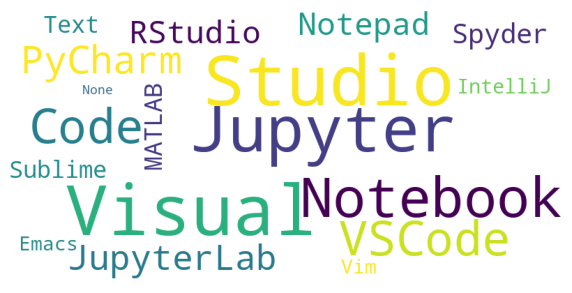

In [45]:
word_cloud('Q13', 'ides', 'Notebooks')

In [46]:
multiple_column("Q14", 'hosted_notes', 'Hosted Notebook', x= 'count', y='hosted_notes')

* **VSCode** (Visual Studio Code) and **Jupyter Notebooks** are the most used among professionals.
* **Google Colaboratory** and **Kaggle Notebooks** are the most widely used hosted notebooks by a large margin.

### DATA WAREHOUSE USED BY EXPERTS

Data Warehouse experts majorly work with are MySQL, PostgreSQL, Google Cloud BigQuery, Microsoft SQL Server, SQLite, MongoDB among others. This is the reason for the important of SQL, so as to be able to communicate with the warehouse.

In [47]:
multiple_column("Q35", 'warehouse', 'Data Warehouse', x= 'count', y='warehouse')

### VISUALIZATION LIBRARIES

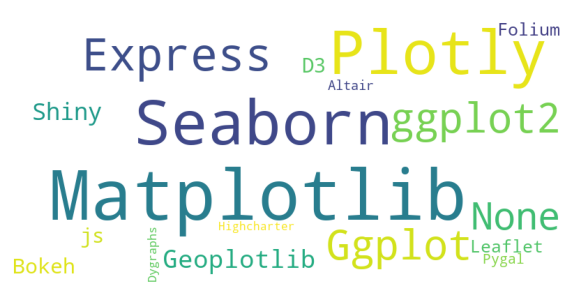

In [48]:
word_cloud("Q15", 'viz_tools', 'Visualization Libraries')

### BI(BUSINESS INTELLIGENCE) TOOLS

In [49]:
multiple_column("Q36", 'bi_tools', 'BI Tools', x= 'bi_tools', y='count')

* The majority of practitioners did not utilize BI tools. However, those that did seem to have a preference for **Tableau** and **Microsoft Power BI** 

### JOB DESCRIPTIONS

In [59]:
jobs = ['Data Scientist',
 'Software Engineer',
 'Research Scientist',
 'Developer Advocate',
 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
 'Data Engineer',
 'Machine Learning/ MLops Engineer',
 'Engineer (non-software)',
 'Teacher / professor',
 'Statistician',
 'Data Administrator',
 'Data Architect']

for job in jobs:
     funnel(job, 'Q28', 'job_desp', 'Job Description Rank', x='count', y='job_desp')

### MEDIA THAT REPORT DATA SCIENCE TOPICS

* Media professionals use to get learn and get updated about the data world are **Kaggle(notebooks, forums, etc), Blogs(Towards Data Science, Analytics Vidhya, etc), YouTube(Kaggle YouTube, Cloud AI Adventure).**

In [60]:
multiple_column("Q44", 'media', 'Media', x= 'count', y= 'media')

### CLOUD COMPUTING PLATFORMS

In [61]:
multiple_column("Q31", 'cloud_computing_platform', 'Frequently used cloud computing platform', x= 'count', y= 'cloud_computing_platform')

In [62]:
multiple_column("Q32", 'cloud_platform', 'Cloud platform with best developer experience', x= 'count', y= 'cloud_platform')

### DATA STORAGE PRODUCT

In [63]:
multiple_column("Q34", 'data_storage', 'Data Storage Product', x= 'count', y= 'data_storage')

## USE OF MACHINE LEARNING

### MOST USED ML FRAMEWORKS

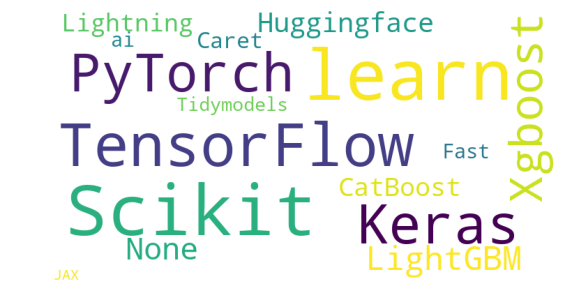

In [64]:
word_cloud("Q17", 'ml_framework', 'ML Framework')

In [65]:
multiple_column("Q18", 'ml_algorithm', 'Most Used ML Algorithms', x= 'count', y= 'ml_algorithm')

### ML HUB / REPOSITORIES USED BY DS AND ML EXPERTS

In [66]:
dist_graph(ds_ml_data, 'Q22', 'ml_hub', 'ml_hub_count', 'ML hub used by DS and ML') 

### RANK OF MANAGED ML PRODUCTS USED BY DS AND ML EXPERTS

In [67]:
multiple_column("Q37", 'managed_ml', 'ML used for model management by DS', x= 'count', y= 'managed_ml')

* More than **50%** of experts do not use any managed ML product. While for those who do, **10%** use **Amazon SageMaker** and **11%** use **Databricks.**

### INTEGRATION OF ML MODELS IN THE ORGANIZATION

In [68]:
dist_graph(ds_ml_data, 'Q27', 'model_esth', 'model_esth_count', 'Model Establishment') 

### CATEGORIES OF COMPUTER VISION 

In [69]:
multiple_column("Q19", 'comp_vision', 'Computer Vision Method', x= 'count', y= 'comp_vision')

### USE OF TPUs (TENSOR PROCESSING UNITS)

* A Tensor Processing Unit (TPU) is an application-specific integrated circuit (ASIC) designed to accelerate machine learning workloads. TPUs are specifically optimized for the matrix operations that are commonly used in neural network computations, and can be used to speed up the training and inference process of deep learning models.

In [72]:
dist_graph(ds_ml_data, 'Q43', 'degree', 'degree_count', 'The use of Tensor Processing Unit among DS and ML experts') 

* More than 50% have never used TPUs while 20% have used it 2-5 times

## INDUSTRY, COMPANY SIZE, DATA TEAM AND COMPENSATION

In [75]:
tree_map('Q24', 'Q25', 'Q26', "Industry + Industry Size + Data Team Size TreeMap")

* Both large and small scale companies make use of data specialists to help them make data-driven decisions. We can see in the chart above where a 59% of companies in IT that have 10000+ employees have 20+ members on their data team. 

### COMPENSATION

In [76]:
dist_graph(ds_ml_data, 'Q29', 'compensation', 'comp_count', 'Compensation') 

Let us compare compensation across industries.

In [77]:
tree_map('Q29', 'Q24', 'Q8', "Industry + Compensation")

Now we look into compensation across countries

In [80]:
tree_map_2('Q4', 'Q29', "Country vs Compensation TreeMap")

# REFERENCE:

*  https://www.kaggle.com/code/varunsaikanuri/2022-kaggle-survey-analysis